In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import quandl
quandl.ApiConfig.api_key = "wUTAs4WCnwRA2PVvz_vd"

In [3]:
aapl = pd.read_csv('/Users/chris/Desktop/python_analysis_algo_trading/learning_numpy/jup/AAPL_CLOSE.csv',index_col='Date',parse_dates=True)
cisco = pd.read_csv('/Users/chris/Desktop/python_analysis_algo_trading/learning_numpy/jup/CISCO_CLOSE',index_col='Date',parse_dates=True)
ibm = pd.read_csv('/Users/chris/Desktop/python_analysis_algo_trading/learning_numpy/jup/IBM_CLOSE',index_col='Date',parse_dates=True)
amzn = pd.read_csv('/Users/chris/Desktop/python_analysis_algo_trading/learning_numpy/jup/AMZN_CLOSE',index_col='Date',parse_dates=True)

In [4]:
cisco.head()

,Adj. Close
Date,
2012-01-03,15.752778
2012-01-04,16.057180
2012-01-05,15.997991
2012-01-06,15.938801
2012-01-09,16.040268


In [6]:
stocks = pd.concat([aapl,cisco,ibm,amzn],axis=1)
stocks.columns = ['aapl', 'cisco','ibm','amzn']

In [7]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,53.063218,15.752778,160.830881,179.03
2012-01-04,53.348386,16.057180,160.174781,177.51
2012-01-05,53.940658,15.997991,159.415086,177.61
2012-01-06,54.504543,15.938801,157.584912,182.61
2012-01-09,54.418089,16.040268,156.764786,178.56


In [8]:
stocks.pct_change(1).mean()

aapl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64

In [9]:
stocks.pct_change(1).corr()

,aapl,cisco,ibm,amzn
aapl,1.000000,0.301990,0.297498,0.235487
cisco,0.301990,1.000000,0.424672,0.284470
ibm,0.297498,0.424672,1.000000,0.258492
amzn,0.235487,0.284470,0.258492,1.000000


In [10]:
stocks.pct_change(1).head(
)

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.019324,-0.004079,-0.008490
2012-01-05,0.011102,-0.003686,-0.004743,0.000563
2012-01-06,0.010454,-0.003700,-0.011481,0.028152
2012-01-09,-0.001586,0.006366,-0.005204,-0.022178


In [11]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


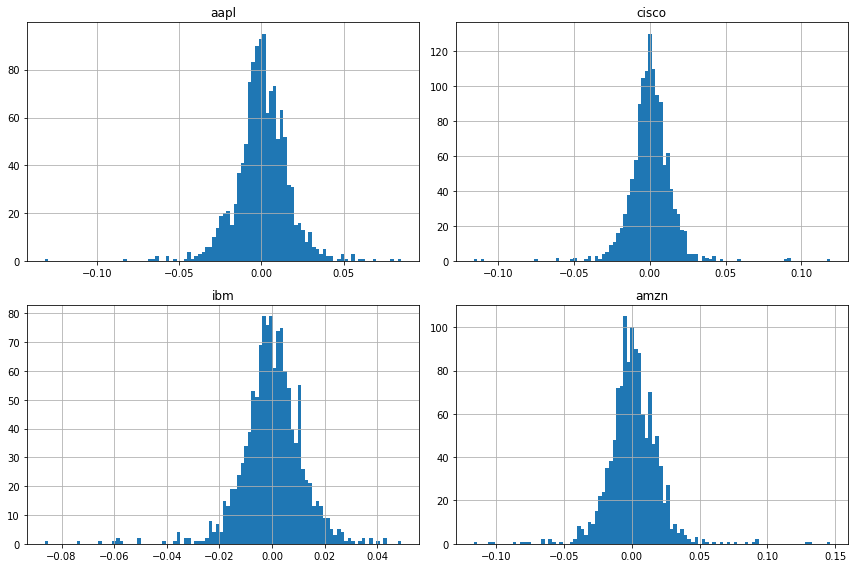

In [13]:
log_ret.hist(bins=100,figsize=(12,8))
plt.tight_layout();

In [14]:
log_ret.mean()

aapl     0.000614
cisco    0.000497
ibm      0.000011
amzn     0.001139
dtype: float64

In [16]:
log_ret.cov() * 252

,aapl,cisco,ibm,amzn
aapl,0.068326,0.017854,0.014464,0.018986
cisco,0.017854,0.051381,0.018029,0.019956
ibm,0.014464,0.018029,0.035203,0.014939
amzn,0.018986,0.019956,0.014939,0.094470


In [26]:
np.random.seed(101)

num_ports = 5000
all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)


for ind in range(num_ports):

    # Weights
    weights = np.array(np.random.random(4))
    weights = weights/np.sum(weights)

    # Save the weights
    all_weights[ind,:] = weights

    # expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) * 252)


    #expected volatitlity
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))


    # Sharp Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [27]:
sharpe_arr.max()

1.030326055127108

In [28]:
sharpe_arr.argmax()

1420

In [29]:
all_weights[1420,:]

array([0.26188068, 0.20759516, 0.00110226, 0.5294219 ])

In [31]:
max_sr_ret = ret_arr[1420]
max_sr_vol = vol_arr[1420]

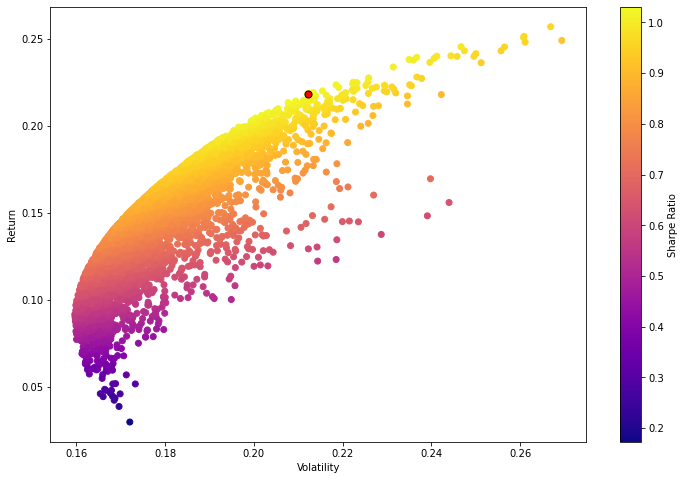

In [32]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

In [35]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [36]:
from scipy.optimize import minimize

In [38]:
def neg_sharp(weights):
    return get_ret_vol_sr(weights)[2] * -1

In [43]:
def check_sum(weights):
    # return 0 if the sum of the weights is 1
    return np.sum(weights) - 1

In [44]:
cons = ({'type':'eq','fun':check_sum})

In [45]:
bounds = ((0,1),(0,1),(0,1),(0,1))

In [47]:
init_guess = [0.25,0.25,0.25,0.25]

In [48]:
opt_results = minimize(neg_sharp,init_guess,method='SLSQP',bounds=bounds, constraints=cons)

In [49]:
opt_results

     fun: -1.0307168703349947
     jac: array([ 5.64306974e-05,  4.18424606e-05,  3.39921728e-01, -4.45097685e-05])
 message: 'Optimization terminated successfully'
    nfev: 35
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([2.66289773e-01, 2.04189824e-01, 1.34034494e-16, 5.29520403e-01])

In [50]:
opt_results.x

array([2.66289773e-01, 2.04189824e-01, 1.34034494e-16, 5.29520403e-01])

In [51]:
get_ret_vol_sr(opt_results.x)

array([0.21885915, 0.21233683, 1.03071687])

In [52]:
frontier_y = np.linspace(0,0.3,100)

In [53]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [63]:
frontier_volatility = []

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq','fun':lambda w: get_ret_vol_sr(w)[0]-possible_return})

    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    frontier_volatility.append(result['fun'])

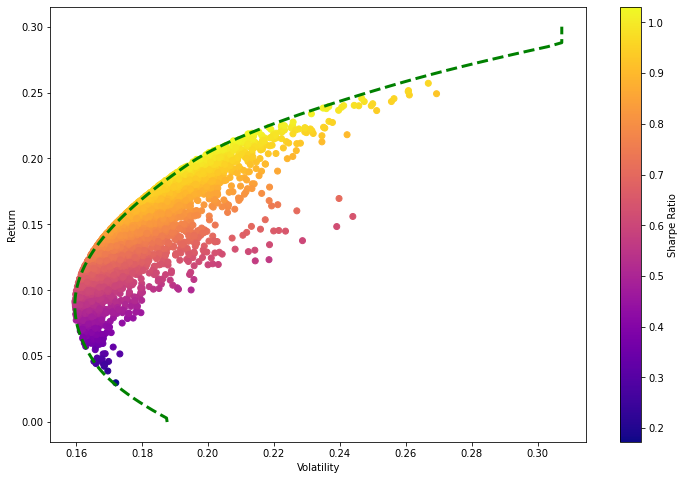

In [65]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.plot(frontier_volatility,frontier_y,'g--', linewidth=3);